# Génération d'un graphe orienté aléatoire avec matrice d'adjacence pondérée

Ce notebook a pour objectif de générer un graphe orienté aléatoire avec une densité contrôlable, pondéré ou non, et d'afficher sa matrice d'adjacence au format exploitable pour notre projet.

Nous utiliserons la bibliothèque **NetworkX** pour la manipulation du graphe, **NumPy** pour les matrices, et **Matplotlib** pour la visualisation.


In [5]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [33]:
def generer_matrice_connexe_et_complete(n_sommets, cout_max=10, taux_travaux=0.2):
    matrice = np.zeros((n_sommets, n_sommets), dtype=int)

    # Étape 1 : générer un arbre couvrant aléatoire => connexité assurée
    sommets = list(range(n_sommets))
    random.shuffle(sommets)

    for i in range(n_sommets - 1):
        a, b = sommets[i], sommets[i + 1]
        cout = random.randint(1, cout_max)
        matrice[a][b] = cout
        matrice[b][a] = cout

    # Étape 2 : remplir toutes les autres cases (graphe complet)
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            if matrice[i][j] == 0:
                if random.random() < taux_travaux:
                    val = -1  # en travaux
                else:
                    val = random.randint(1, cout_max)  # praticable
                matrice[i][j] = val
                matrice[j][i] = val

    # Diagonale : pas de boucle
    np.fill_diagonal(matrice, -1)

    # Vérification finale : s'assurer que le graphe praticable est connexe
    G = nx.Graph()
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            if matrice[i][j] > 0:
                G.add_edge(i, j)

    if not nx.is_connected(G):
        # Si jamais le graphe n'est plus connexe (très rare), on reconnecte manuellement
        composants = list(nx.connected_components(G))
        for k in range(len(composants) - 1):
            u = random.choice(list(composants[k]))
            v = random.choice(list(composants[k + 1]))
            cout = random.randint(1, cout_max)
            matrice[u][v] = cout
            matrice[v][u] = cout

    return matrice


Cette fonction `generer_matrice_connexe_et_complete` crée une matrice représentant un graphe :
- Connexe grâce à la génération d’un arbre couvrant initial.
- Complet, car toutes les paires de sommets sont connectées ensuite.
- Les routes sont soit :
  - **en travaux** (valeur `-1`)
  - **praticables** (valeurs > 0, avec un coût aléatoire)
Contrairement à la version précédente, **aucune route n'est absente** (valeur `0`).


In [11]:
def afficher_matrice_liste(matrice):
    print("[")
    for ligne in matrice:
        print("    " + str(list(map(int, ligne))) + ",")
    print("]")


La fonction `afficher_matrice_liste` permet d'afficher la matrice sous forme de liste de listes, ce qui rend la lecture plus facile et plus claire.


In [13]:
def afficher_graphe(matrice):

    G = nx.Graph()
    n_sommets = len(matrice)

    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            poids = matrice[i][j]
            if poids != 0:  # On ignore seulement les absences (mais ici, y'en a pas)
                G.add_edge(i + 1, j + 1, weight=poids, travaux=(poids == -1))

    pos = nx.spring_layout(G, seed=42)

    edge_colors = ['red' if G[u][v]['travaux'] else 'gray' for u, v in G.edges()]
    edge_labels = {
        (u, v): ('' if G[u][v]['travaux'] else G[u][v]['weight']) for u, v in G.edges()
    }

    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos, with_labels=True, node_color='skyblue', node_size=600,
        edge_color=edge_colors, width=2, font_weight='bold'
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
    plt.title("Graphe Complet – Routes praticables (gris), en travaux (rouge)")
    plt.show()


Cette fonction `afficher_graphe` construit un graphe à partir de la matrice :
- Les arêtes **praticables** sont affichées en **gris** avec leur coût.
- Les arêtes **en travaux** sont affichées en **rouge** sans étiquette de poids.
Elle utilise `networkx` et `matplotlib` pour représenter visuellement la structure du graphe.


[
    [-1, 15, 191, 26, 187, 108],
    [15, -1, 135, 11, 143, 179],
    [191, 135, -1, 35, 22, 143],
    [26, 11, 35, -1, 56, -1],
    [187, 143, 22, 56, -1, 71],
    [108, 179, 143, -1, 71, -1],
]


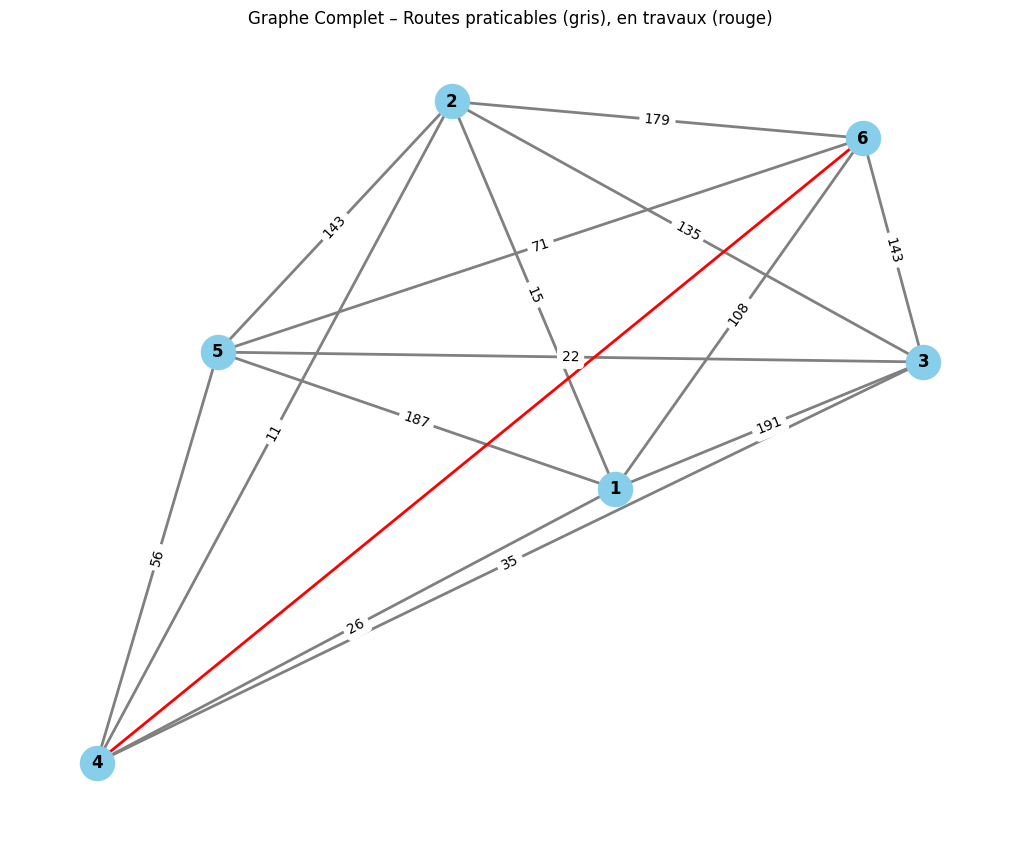

In [38]:
n_sommets = 8
matrice = generer_matrice_connexe_et_complete(n_sommets=6,cout_max=200,taux_travaux=0.2)
afficher_matrice_liste(matrice)
afficher_graphe(matrice)


Cette cellule utilise les fonctions précédentes pour :
- Générer une matrice de graphe avec 8 sommets, sans routes absentes.
- Afficher la matrice correspondante.
- Visualiser le graphe avec les routes praticables et celles en travaux.
